In [1]:
import numpy as np 
import pandas as pd
from scipy.io import loadmat
import matplotlib.pyplot as plt

In [2]:
def load_data(nb_action, nb_sujet, nb_essai, data):
    try:
        file = loadmat("./imu_data/a{0}_s{1}_t{2}_inertial.mat".format(nb_action, nb_sujet, nb_essai))
        file_data = file['d_iner']
        for line in file_data:
            data["accéléromètre_X"].append(line[0])
            data["accéléromètre_Y"].append(line[1])
            data["accéléromètre_Z"].append(line[2])
            data["gyroscope_X"].append(line[3])
            data["gyroscope_Y"].append(line[4])
            data["gyroscope_Z"].append(line[5])
            data["id_sujet"].append(nb_sujet)
            data["id_essai"].append(nb_essai)
            data["id_action"].append(nb_action)
    except:
        print("fichier a{0}_s{1}_t{2}_inertial.mat manquant".format(nb_action, nb_sujet, nb_essai))

data = {
    "accéléromètre_X": [],
    "accéléromètre_Y": [],
    "accéléromètre_Z": [],
    "gyroscope_X": [],
    "gyroscope_Y": [],
    "gyroscope_Z": [],
    "id_sujet": [],
    "id_essai": [],
    "id_action": []
}

for action in range(1, 28):
    for sujet in range(1, 9):
        for essai in range(1, 5):
            # lire le contenu du fichier et l'ajouter au dataframe
            # appeler la fonction qui lit le fichier souhaité
            load_data(action, sujet, essai, data)

data = pd.DataFrame(data)
data.to_csv('dataset_imu.csv')

fichier a8_s1_t4_inertial.mat manquant
fichier a23_s6_t4_inertial.mat manquant
fichier a27_s8_t4_inertial.mat manquant


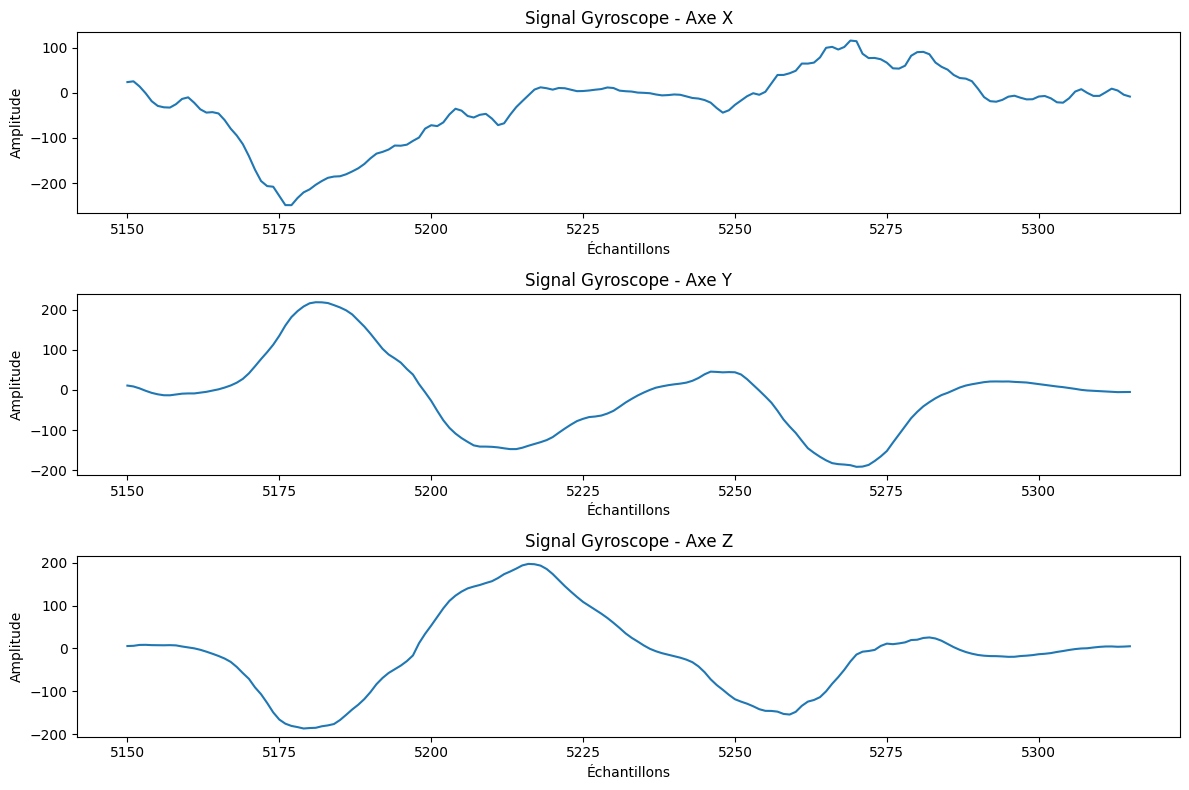

In [3]:
def tracer_signal(dataframe, capteur, num_action, num_sujet, num_essai):
    subset = dataframe[(dataframe['id_action'] == num_action) & 
                       (dataframe['id_sujet'] == num_sujet) & 
                       (dataframe['id_essai'] == num_essai)]

    if capteur == 1:  # Accéléromètre
        signal_x = subset['accéléromètre_X']
        signal_y = subset['accéléromètre_Y']
        signal_z = subset['accéléromètre_Z']
        capteur_name = 'Accéléromètre'
    elif capteur == 2:  # Gyroscope
        signal_x = subset['gyroscope_X']
        signal_y = subset['gyroscope_Y']
        signal_z = subset['gyroscope_Z']
        capteur_name = 'Gyroscope'
    else:
        print("Capteur non valide.")
        return

    # Créer un graphique pour chaque signal
    plt.figure(figsize=(12, 8))

    plt.subplot(3, 1, 1)
    plt.plot(signal_x)
    plt.title(f'Signal {capteur_name} - Axe X')
    plt.xlabel('Échantillons')
    plt.ylabel('Amplitude')

    plt.subplot(3, 1, 2)
    plt.plot(signal_y)
    plt.title(f'Signal {capteur_name} - Axe Y')
    plt.xlabel('Échantillons')
    plt.ylabel('Amplitude')

    plt.subplot(3, 1, 3)
    plt.plot(signal_z)
    plt.title(f'Signal {capteur_name} - Axe Z')
    plt.xlabel('Échantillons')
    plt.ylabel('Amplitude')

    plt.tight_layout()
    plt.show()

# Exemple d'utilisation :
tracer_signal(data, capteur=2, num_action=2, num_sujet=1, num_essai=1)

In [4]:
# Partie 7 : Calcul des attributs (moyenne et écart-type pour l'instant)
# Chaque action aura un vecteur de 12 de long avec la moyenne et l'écart-type des 6 capteurs
def feature_extraction_moyenne(dataframe: pd.DataFrame):
    res = []
    # On cycle sur les 27 actions possibles (de 1 à 27)
    for num_action in range(1, 28):
        # Dataframe des lignes de l'action i
        subset = dataframe[(dataframe['id_action'] == 1)]
        res.append([subset['accéléromètre_X'].mean(), 
                    subset['accéléromètre_Y'].mean(), 
                    subset['accéléromètre_Z'].mean(),
                    subset['gyroscope_X'].mean(),
                    subset['gyroscope_Y'].mean(),
                    subset['gyroscope_Z'].mean()
                    ])
    return res

def feature_extraction_ecart_type(dataframe: pd.DataFrame):
    res = []
    # On cycle sur les 27 actions possibles (de 1 à 27)
    for num_action in range(1, 28):
        # Dataframe des lignes de l'action i
        subset = dataframe[(dataframe['id_action'] == num_action)]
        res.append([subset['accéléromètre_X'].std(),
                    subset['accéléromètre_Y'].std(), 
                    subset['accéléromètre_Z'].std(),
                    subset['gyroscope_X'].std(),
                    subset['gyroscope_Y'].std(),
                    subset['gyroscope_Z'].std()
                    ])
    return res


In [5]:
# Partie 8 : normalisation des données
def normalize_data(data: pd.DataFrame):
    # Division du dataset original en 4 datasets (apprentissage & test)
    training_dataset = data[(data['id_sujet'] == 1) | 
                            (data['id_sujet'] == 3) | 
                            (data['id_sujet'] == 5) | 
                            (data['id_sujet'] == 7)]
    training_labels = training_dataset['id_action']
    
    testing_dataset = data[(data['id_sujet'] == 2) |
                           (data['id_sujet'] == 4) | 
                           (data['id_sujet'] == 6) | 
                           (data['id_sujet'] == 8)]
    testing_labels = testing_dataset['id_action']
    
    moyennes = feature_extraction_moyenne(data)
    ecarts_types = feature_extraction_ecart_type(data)

    # Normalisation des données d'apprentissage
    for index, row in training_dataset.iterrows():
        training_dataset.at[index,'accéléromètre_X'] = (row['accéléromètre_X'] - moyennes[int(row['id_action']) - 1][0])/(ecarts_types[int(row['id_action']) - 1][0])
        training_dataset.at[index,'accéléromètre_Y'] = (row['accéléromètre_Y'] - moyennes[int(row['id_action']) - 1][1])/(ecarts_types[int(row['id_action']) - 1][1])
        training_dataset.at[index,'accéléromètre_Z'] = (row['accéléromètre_Z'] - moyennes[int(row['id_action']) - 1][2])/(ecarts_types[int(row['id_action']) - 1][2])
        training_dataset.at[index,'gyroscope_X'] = (row['gyroscope_X'] - moyennes[int(row['id_action']) - 1][3])/(ecarts_types[int(row['id_action']) - 1][3])
        training_dataset.at[index,'gyroscope_Y'] = (row['gyroscope_Y'] - moyennes[int(row['id_action']) - 1][4])/(ecarts_types[int(row['id_action']) - 1][4])
        training_dataset.at[index,'gyroscope_Z'] = (row['gyroscope_Z'] - moyennes[int(row['id_action']) - 1][5])/(ecarts_types[int(row['id_action']) - 1][5])

    for index, row in testing_dataset.iterrows():
        testing_dataset.at[index,'accéléromètre_X'] = (row['accéléromètre_X'] - moyennes[int(row['id_action']) - 1][0])/(ecarts_types[int(row['id_action']) - 1][0])
        testing_dataset.at[index,'accéléromètre_Y'] = (row['accéléromètre_Y'] - moyennes[int(row['id_action']) - 1][1])/(ecarts_types[int(row['id_action']) - 1][1])
        testing_dataset.at[index,'accéléromètre_Z'] = (row['accéléromètre_Z'] - moyennes[int(row['id_action']) - 1][2])/(ecarts_types[int(row['id_action']) - 1][2])
        testing_dataset.at[index,'gyroscope_X'] = (row['gyroscope_X'] - moyennes[int(row['id_action']) - 1][3])/(ecarts_types[int(row['id_action']) - 1][3])
        testing_dataset.at[index,'gyroscope_Y'] = (row['gyroscope_Y'] - moyennes[int(row['id_action']) - 1][4])/(ecarts_types[int(row['id_action']) - 1][4])
        testing_dataset.at[index,'gyroscope_Z'] = (row['gyroscope_Z'] - moyennes[int(row['id_action']) - 1][5])/(ecarts_types[int(row['id_action']) - 1][5])
    
    return training_dataset, training_labels, testing_dataset, testing_labels

training_dataset, training_labels, testing_dataset, testing_labels = normalize_data(data)

# training_dataset.drop('id_action', axis=1)
# testing_dataset.drop('id_action', axis=1)

training_dataset.to_csv('training_dataset.csv')
training_labels.to_csv('training_labels.csv')
testing_dataset.to_csv('testing_dataset.csv')
testing_labels.to_csv('testing_labels.csv')


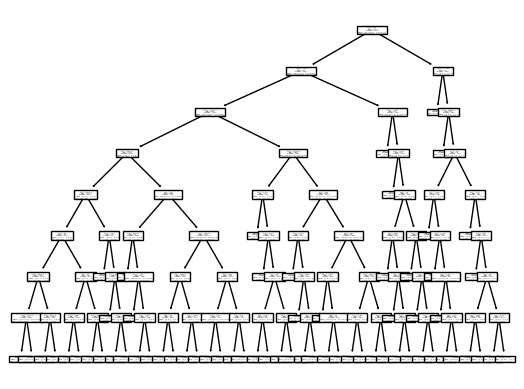

In [7]:
# Partie 9
from sklearn import tree
from sklearn.metrics import accuracy_score

# Arbre de décision
data = pd.read_csv("training_dataset.csv")
labels = pd.read_csv("training_labels.csv")
clf = tree.DecisionTreeClassifier(max_depth=8)
clf = clf.fit(data,labels)

# tree.plot_tree(clf, feature_names=['Accel X', 'Accel Y', 'Accel Z', 'Gyro X', 'Gyro Y', 'Gyro Z'], class_names=[str(i) for i in list(range(1, 28))], filled=True)
tree.plot_tree(clf)
plt.show()

predictions = clf.predict(training_dataset)
accuracy = accuracy_score(testing_labels, predictions)
print(f"Précision de l'arbre de décision : {accuracy * 100:.2f}%")

In [13]:
testing_dataset = pd.read_csv('testing_dataset.csv')
testing_labels = pd.read_csv('testing_labels.csv')

predictions = []
for index, row in testing_dataset.iterrows():
    predictions.append(clf.predict())

accuracy = accuracy_score(testing_labels, predictions)
print(f"Précision de l'arbre de décision : {accuracy * 100:.2f}%")

/home/ajonch/Documents/IMT NE CI2/AADA/Data Mining & Machine Learning/Projet/code/env/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 1 features, but DecisionTreeClassifier is expecting 10 features as input.

In [ ]:
from sklearn.neural_network import MLPClassifier

neural_network = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
neural_network.fit(data, labels)

testing_dataset = pd.read_csv('testing_dataset.csv')
testing_labels = pd.read_csv('testing_labels.csv')

clf.predict(,)

In [3]:
import pandas as pd
import numpy as np

# Create a sample DataFrame
data = {'A': [1, 2, 3],
        'B': [4, 5, 6],
        'C': [7, 8, 9]}

df = pd.DataFrame(data)

# Display the original DataFrame
print("Original DataFrame:")
print(df)

# Get the name of the last column
last_column = df.columns[-1]

# Set all values in the last column to None (or any other value you prefer)
df[last_column] = None

# Display the DataFrame after updating the last column
print("\nDataFrame after updating the last column:")
print(df)

# Drop the last column in place
df.drop(columns=[last_column], inplace=True)

# Display the modified DataFrame
print("\nDataFrame after dropping the last column (modified in place):")
print(df)



Original DataFrame:
   A  B  C
0  1  4  7
1  2  5  8
2  3  6  9

DataFrame after updating the last column:
   A  B     C
0  1  4  None
1  2  5  None
2  3  6  None

DataFrame after dropping the last column (modified in place):
   A  B
0  1  4
1  2  5
2  3  6
